# Configuration 



Dataset available on kaggle : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [10]:
"""Importing torch library : PyTorch is an open-source ML library used for various tasks such as deep learning, neural networks, 
and tensor computations. It provides a flexible platform for training and learning models"""

import torch 

"""Numpy is for scientific computing with python. It provides support for large, multi-dimensional arrays and matrices, along
with mathematical functions to operate on these arrays"""

import numpy as np 

"""Matplotlib is a 2D plotting library. It allows you to create static, animated, and interactive visualizations in python"""

import matplotlib.pyplot as plt 

"""The os module provides a way of using operating system-dependent functionality, such as reading or writing to the file 
systems, interacting with command line etc"""

import os 

"""TQDM is a fast, extensible progress bar module for python and cli. It provides a visual indication of the progress
of an iterable's execution. example: adding progress bars to loops, monitoring the progress of data processing tasks."""

from tqdm.notebook import tqdm 

In [11]:
class CFG:
    
    epochs = 1                                         # No. of epochs of training the model 
    lr = 0.001                                         # Learning rate 
    batch_size = 16                                    # Batch Size For Dataset 
    
    model_name = 'tf_efficientnet_b4_ns'               # Model name (We are going to import model from timm)
    img_size = 224
    
    # Going to be use for loading dataset 
    DATA_DIR = "chest_xray_data"                       # Data Directory 
    TEST = 'test'                                      # Test folder name in data directory 
    TRAIN = 'train'                                    # Train folder name in data directory 
    VAL ='val'                                         # Valid folder name in data directory 
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
print("On which device we are on : {}".format(device))

On which device we are on : cpu


# Image Transformation and Load Dataset 

In [12]:
""" TorchVision is a library within PyTorch for image and video processing, it contains a number of important and useful 
data sets, model architecture, as well as models and transformation operations that are commonly used for computer 
vision projects."""
"""transforms module within torchvision provides a set of common image transformations that can be applied to 
images or datasets. Aliasing it as T makes it easier to use."""
""" Transformations include resizing, cropping, flipping, normalization, etc. These transformations are often applied to images 
before training a neural network."""
"""Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your 
own datasets."""
from torchvision import transforms as T, datasets

#show_image is a custom function defined in  file helper

from helper import show_image

In [13]:
train_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.RandomRotation(degrees=(-20,+20)),
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

valid_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


test_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])            

In [14]:
train_path = os.path.join(CFG.DATA_DIR,CFG.TRAIN)
valid_path = os.path.join(CFG.DATA_DIR,CFG.VAL)
test_path = os.path.join(CFG.DATA_DIR,CFG.TEST)

trainset = datasets.ImageFolder(train_path,transform = train_transform)
validset = datasets.ImageFolder(valid_path,transform = valid_transform)
testset = datasets.ImageFolder(test_path,transform = test_transform)

In [15]:
print("Trainset Size : {}".format(len(trainset)))
print("Validset Size : {}".format(len(validset)))
print("Testset Size : {}".format(len(testset)))

Trainset Size : 5216
Validset Size : 16
Testset Size : 624


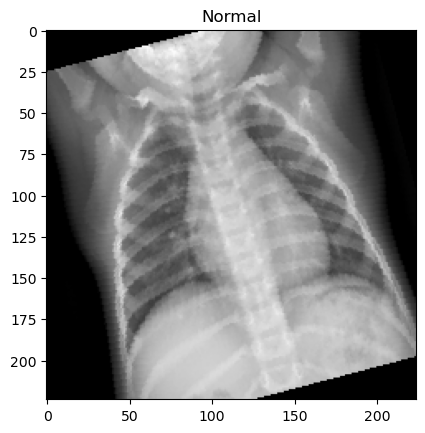

In [17]:
image,label = trainset[2]
class_name=["Normal","Pneomonia"]
show_image(image,class_name[label])

# Load Dataset into Batches 

In [ ]:
from torch.utils.data import DataLoader 
from torchvision.utils import make_grid
from helper import show_grid

In [ ]:
print("No. of batches in trainloader : {}".format(len(trainloader)))
print("No. of Total examples : {}".format(len(trainloader.dataset)))

# Fine Tuning EfficientNet Model 

In [ ]:
from torch import nn 
import torch.nn.functional as F
import timm 



In [ ]:
from torchsummary import summary 



# Build a Simple Trainer

In [ ]:
from helper import accuracy

In [ ]:
class PneumoniaTrainer():
    
    def __init__(self):
        pass
    
    def train_batch_loop(self):
        pass

    
    def valid_batch_loop(self):
        pass
            
        
    def fit(self):
        pass

# Training Model 


Trained on google colab : https://colab.research.google.com/drive/1C5nNPj7OLYMGnNvWBU5W2zSXfgWDdXCo?usp=sharing

# Plot Results 

In [ ]:
from helper import view_classify




print("Test Loss : {}".format(avg_test_acc))
print("Test Acc : {}".format(avg_test_loss))

In [ ]:
image,label = testset[3]

ps = model(image.unsqueeze(0))
ps = F.softmax(ps,dim = 1)

view_classify(image,ps,label)